In [27]:
import tensorflow as tf
from tensorflow.keras.models import *
from tensorflow.keras.layers import *
from tensorflow.keras import regularizers
from tensorflow.keras.optimizers import *

from tensorflow.keras.mixed_precision import experimental as mixed_precision
policy = mixed_precision.Policy('mixed_float16')
mixed_precision.set_policy(policy)
print('Compute dtype: %s' % policy.compute_dtype)
print('Variable dtype: %s' % policy.variable_dtype)

import matplotlib.pyplot as plt
import numpy as np
import json
import cv2
import time

Compute dtype: float16
Variable dtype: float32


In [ ]:
def ConvB(x, layers):
    residual = x
    x = Activation('relu')(x)
    x = SeparableConv2D(layers, (3, 3),padding='same',use_bias=False)(x)
    x = BatchNormalization(axis=channel_axis)(x)
    x = Activation('relu')(x)
    x = SeparableConv2D(layers, (3, 3),padding='same',use_bias=False)(x)
    x = BatchNormalization(axis=channel_axis)(x)
    x = Activation('relu')(x)
    x = SeparableConv2D(layers, (3, 3),padding='same',use_bias=False)(x)
    x = BatchNormalization(axis=channel_axis)(x)
    x = add([x, residual])
    return x  

def ConvA(x, layers):
    residual = Conv2D(layers, (1, 1),strides=(2, 2),padding='same',use_bias=False)(x)
    residual = BatchNormalization(axis=channel_axis)(residual)
    x = SeparableConv2D(layers, (3, 3), padding='same',use_bias=False)(x)
    x = BatchNormalization(axis=channel_axis)(x)
    x = Activation('relu')(x)
    x = SeparableConv2D(layers, (3, 3),padding='same',use_bias=False)(x)
    x = BatchNormalization(axis=channel_axis)(x)
    x = MaxPooling2D((3, 3),strides=(2, 2),padding='same',)(x)
    x = add([x, residual])
    return x  

def ConvC(x, layers):
    residual = Conv2D(512, (1, 1), strides=(2, 2),padding='same', use_bias=False)(x)
    residual = BatchNormalization(axis=channel_axis)(residual)
    x = Activation('relu')(x)
    x = SeparableConv2D(512, (3, 3),padding='same',use_bias=False)(x)
    x = BatchNormalization(axis=channel_axis)(x)
    x = Activation('relu')(x)
    x = SeparableConv2D(512, (3, 3),padding='same',use_bias=False)(x)
    x = BatchNormalization(axis=channel_axis)(x)
    x = MaxPooling2D((3, 3),strides=(2, 2),padding='same')(x)
    x = add([x, residual])
    x = SeparableConv2D(728, (3, 3),padding='same', use_bias=False)(x)
    x = BatchNormalization(axis=channel_axis)(x)
    x = Activation('relu')(x)
    x = SeparableConv2D(1024, (3, 3),padding='same',use_bias=False)(x)
    x = BatchNormalization(axis=channel_axis)(x)
    x = Activation('relu')(x)
    return x  

In [ ]:
channel_axis = 1

inputs = Input(shape=(224,224,48))
x = Conv2D(128, (3, 3),strides=(2, 2),use_bias=False, padding='SAME')(inputs)
x = BatchNormalization(axis=channel_axis)(x)
x = Activation('relu')(x)
x = Conv2D(128, (3, 3), use_bias=False, padding='SAME')(x)
x = BatchNormalization(axis=channel_axis)(x)
x = Activation('relu')(x)

x = ConvA(x, 256)
x = ConvA(x, 512)

x = ConvB(x, 512)
x = ConvB(x, 512)
#x = ConvB(x, 728)
#
x = ConvC(x, 728)
#
x = GlobalAveragePooling2D(name='avg_pool')(x)
outputs = Dense(1, activation='sigmoid', name='predictions', dtype='float32')(x)
#outputs = Activation('softmax', dtype='float32')(x)
#x = Dense(1, activation='sigmoid', name='predictions')(x)

model = Model(inputs=[inputs], outputs=[outputs])
#model.summary()

reduce_lr = tf.keras.callbacks.ReduceLROnPlateau(monitor='val_loss', factor=0.2, patience=5, min_lr=1e-4)
adam = Adam(learning_rate=1e-3, beta_1=0.9, beta_2=0.999)

model.compile(loss='binary_crossentropy', optimizer=adam)

In [4]:
x = np.random.uniform(0,1,(1000, 224, 224, 48))
y = np.random.uniform(0,1,(1000, 1))

In [ ]:
history = model.fit(x, y,
                    batch_size=16,
                    epochs=5,
                    validation_split=0.2,
                    callbacks=[reduce_lr])

In [2]:
import numpy as np
import keras

class DataGenerator(keras.utils.Sequence):
    'Generates data for Keras'
    def __init__(self, list_IDs, labels, batch_size=32, dim=(32,32,32), n_channels=1,
                 n_classes=10, shuffle=True):
        'Initialization'
        self.dim = dim#Dimension is easy enough
        self.batch_size = batch_size#So is batch size
        self.labels = labels#
        self.list_IDs = list_IDs
        self.n_channels = n_channels
        self.n_classes = n_classes
        self.shuffle = shuffle
        self.on_epoch_end()

    def __len__(self):
        'Denotes the number of batches per epoch'
        return int(np.floor(len(self.list_IDs) / self.batch_size))

    def __getitem__(self, index):
        'Generate one batch of data'
        # Generate indexes of the batch
        indexes = self.indexes[index*self.batch_size:(index+1)*self.batch_size]

        # Find list of IDs
        list_IDs_temp = [self.list_IDs[k] for k in indexes]

        # Generate data
        X, y = self.__data_generation(list_IDs_temp)

        return X, y

    def on_epoch_end(self):
        'Updates indexes after each epoch'
        self.indexes = np.arange(len(self.list_IDs))
        if self.shuffle == True:
            np.random.shuffle(self.indexes)

    def __data_generation(self, list_IDs_temp):
        'Generates data containing batch_size samples' # X : (n_samples, *dim, n_channels)
        # Initialization
        X = np.empty((self.batch_size, *self.dim, self.n_channels))
        y = np.empty((self.batch_size), dtype=int)

        # Generate data

Using TensorFlow backend.


In [7]:
%timeit = plt.imread()

tensorflow.python.keras.utils.data_utils.Sequence

In [6]:
import json
with open('D:\\faces\\data.json', 'r', encoding='utf-8') as f:
    data = json.load(f)

In [88]:
for i in range(len(data['data'])):
    data['data'][i]['location'] = data['data'][i]['location'][:len(data['data'][i]['location'])-4]
    #data['data'][i]['location'] = data['data'][i]['location']+'.png'

In [89]:
with open('D:\\faces\\data.json', 'w', encoding='utf-8') as f:
    json.dump(data, f, ensure_ascii=False, indent=4)

In [75]:
files = [os.path.join('D:\\faces\\f1\\'+file) for file in os.listdir('D:\\faces\\f1')]
len(files)

422382

In [51]:
class dataloader(tf.keras.utils.Sequence):
    #Generates data for keras
    def __init__(self, data_path, list_IDs, batch_size=16, dim=(224,224), n_channels=48,shuffle=True):
        self.dim = dim
        self.batch_size = batch_size
        self.list_IDs = list_IDs
        self.n_channels = n_channels
        self.shuffle = shuffle
        self.on_epoch_end()
        
        with open(data_path, 'r') as f:
            self.data = json.load(f)['data']
            
    def __getitem__(self, index):
        'Generate one batch of data'
        # Generate indexes of the batch
        indexes = self.indexes[index*self.batch_size:(index+1)*self.batch_size]

        # Find list of IDs
        list_IDs_temp = [self.list_IDs[k] for k in indexes]

        X = np.empty((self.batch_size, *self.dim, self.n_channels), dtype = np.float32)
        y = np.empty((self.batch_size), dtype=np.float32)
        
        for i, ID in enumerate(list_IDs_temp):
            X[i,] = self.get_frames(ID)
            
        return X, y        
    
            
    def __len__(self):
        'Denotes the number of batches per epoch'
        return int(np.floor(len(self.list_IDs) / self.batch_size))
    
    def get_frames(self, index):
        data = self.data[index]
        #x = np.empty((*self.dim, self.n_channels), dtype = np.float32)
        file_name = data['location']
        num_faces = data['face_count']
        a = 0
        if (num_faces > 1):
            a = np.random.randint(0,num_faces)
        frame_count = data['frames'][a]
        offset = np.random.randint(0,frame_count-16)
        
        x = np.dstack([self.load_image(file_name+'_'+str(a)+'_'+str(i)+'.png') for i in range(offset, offset+16)])
        #x = np.dstack([dl.load_image(dl.data[index]['location']+'_'+str(0)+'_'+str(h)+'.png') for h in range(16)])
        return x
    
    def load_image(self, path):
        img = cv2.imread(path)
        return cv2.cvtColor(img, cv2.COLOR_BGR2RGB)/255.0
    
    def on_epoch_end(self):
        'Updates indexes after each epoch'
        self.indexes = np.arange(len(self.list_IDs))
        if self.shuffle == True:
            np.random.shuffle(self.indexes)

    
    
    
dl = dataloader('D:\\faces\\data.json',np.arange(100),dim = (224,224))
#%timeit X = dl.__getitem__(0)
#%timeit X = dl.get_frames(10)

start = time.time()
X = [dl.get_frames(i+100) for i in range(16)]
end = time.time()

s

def lol():
    
    for i in range(16):
        x = np.dstack([dl.load_image(dl.data[i]['location']+'_'+str(0)+'_'+str(h)+'.png') for h in range(100, 100+16)])        
%timeit lol()

0.6651558876037598


In [55]:
%timeit cv2.imread('D://faces//aaqaifqrwn_0_0.png')
%timeit cv2.imread('D://faces//aaqaifqrwn_0_0.jpg')
%timeit plt.imread('D://faces//aaqaifqrwn_0_0.png')
%timeit plt.imread('D://faces//aaqaifqrwn_0_0.jpg')

1.02 ms ± 3.28 µs per loop (mean ± std. dev. of 7 runs, 1000 loops each)
595 µs ± 1.08 µs per loop (mean ± std. dev. of 7 runs, 1000 loops each)
1.2 ms ± 3.06 µs per loop (mean ± std. dev. of 7 runs, 1000 loops each)
670 µs ± 2.05 µs per loop (mean ± std. dev. of 7 runs, 1000 loops each)


In [14]:
for i in range(10,15):
    print(i)

10
11
12
13
14


TypeError: tuple indices must be integers or slices, not tuple

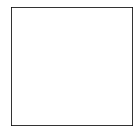

In [206]:
plt.figure(figsize=(10,10))
for i in range(16):
    plt.subplot(4,4,i+1)
    plt.xticks([])
    plt.yticks([])
    plt.grid(False)
    plt.imshow(X[:,:,i*3:(i*3)+3])
    plt.xlabel('b')
plt.show()

In [29]:
def gathery():
        a = 0
        if (3 > 1):
            a = np.random.randint(0,3)
        print(a)

In [35]:
 X = np.empty((*dl.dim, dl.n_channels))

1


In [44]:
#dl.data['face_count']
dl.data[46]

{'location': 'D:\\faces\\f1\\aymlynzeni',
 'label': 0,
 'face_count': 2,
 'frames': [300, 299],
 'original': 'doniqevxeg.mp4'}

In [109]:
X.dtype

dtype('float64')